In [1]:
%pylab inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import re
import datetime as dt
import matplotlib.pyplot as plt
import time
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
def ht(df, n = 5):
    print(df.shape)
    if len(df) <= 2*n:
        display(df)
    else:
        display(df.head(n).append(df.tail(n)))
def pf(df):
    pd.set_option('display.max_rows', len(df))
    display(df)
    pd.reset_option('display.max_rows')

In [3]:
pd.set_option('display.max_columns', 100)
plt.rc('figure', figsize=(13, 7))
plt.style.use('ggplot')

In [4]:
import mlrose

/Users/frankz/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [5]:
random_seed_list = [199, 197, 193, 191, 181, 179, 173, 167, 163, 157]

## Part2

In [6]:
def RHC_HP(restarts, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, 157]):
    best_fitness_list = []
    wall_clock_time_list = []    
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(
            problem, 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            restarts=eval(restarts), 
            init_state=init_state, 
            curve=True, 
            random_state=random_seed_list[i]
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'restarts={restarts}, max_attempts={max_attempts}'
        df['RO'] = 'RHC'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

def SA_HP(init_temp, exp_const, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, 157]):
    best_fitness_list = []
    wall_clock_time_list = []    
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(
            problem, 
            schedule = mlrose.ExpDecay(init_temp = eval(init_temp), exp_const=eval(exp_const), min_temp=1e-10),
            max_attempts = eval(max_attempts), 
            max_iters = 5000,
            init_state = init_state, 
            random_state = random_seed_list[i], 
            curve = True
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'T={init_temp},r={exp_const},max_attempts={max_attempts}'
        df['RO'] = 'SA'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

def GA_HP(pop_size, mut_prob, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, 157]):
    best_fitness_list = []
    wall_clock_time_list = []
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(
            problem, 
            pop_size = eval(pop_size),
            mutation_prob=eval(mut_prob), 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            random_state = random_seed_list[i], 
            curve = True
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'pop_size={pop_size},mut_prob={mut_prob},max_attempts={max_attempts}'
        df['RO'] = 'GA'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list        

def MIMIC_HP(pop_size, keep_pct, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, 157], fast_mimic=True):
    best_fitness_list = []
    wall_clock_time_list = []
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.mimic(
            problem, 
            pop_size=eval(pop_size), 
            keep_pct=eval(keep_pct), 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            curve=True, 
            random_state=random_seed_list[i], 
            fast_mimic=fast_mimic
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'pop_size={pop_size},keep_pct={keep_pct},max_attempts={max_attempts}'
        df['RO'] = 'MIMIC'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

In [9]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [10]:
def cleanBosonData(infile_name):
    df = pd.read_csv(infile_name, index_col=0) # Import data and use 1st column as index
    df['Y'] = (df['Label'] == 's') * 1 # Convert 'Label' to numeric and set minority class 's' as 1
    data_clean = df.drop('Label', 1) # Drop the column 'Label'  
    
    # Create dummy variables that denotes missing values as 1 and others as 0
    mask = data_clean.isin([-999])
    colnames_missing = []
    for col in mask.columns:
        if mask[col].sum() != 0:
            colnames_missing.append(col)
            data_clean[col + '_mv'] = mask[col]*1
    
    # Replace the missing value with the mean of non-missing values
    for col in colnames_missing:
        data_clean[col] = data_clean[col].replace(-999, data_clean[col][data_clean[col+'_mv'] == 0].mean())
    
    # Rescale the data with mean = 0 and std.dev = 1
    data_clean.iloc[:, 0:9] = preprocessing.scale(data_clean.iloc[:, 0:9])
    
    return data_clean

In [60]:
dfData = cleanBosonData("boson_cut.csv").head(5000)

In [61]:
ht(dfData)

(5000, 14)


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,Y,DER_mass_MMC_mv,DER_deltaeta_jet_jet_mv,DER_mass_jet_jet_mv,DER_prodeta_jet_jet_mv
EventId,,,,,,,,,,,,,,
300000,-1.213348e-01,1.455304,0.099593,-0.447028,0.000000,-2.659827e-16,4.017959e-16,0.007415,0.498029,0,0,1,1,1
300001,-1.067373e+00,-0.715757,-0.854408,-0.103307,0.000000,-2.659827e-16,4.017959e-16,-0.758743,1.730043,0,0,1,1,1
300002,-1.159847e-01,0.480365,0.064286,-0.297389,-0.287484,6.645349e-01,-7.332925e-02,0.465570,0.505136,1,0,0,0,0
300003,8.355185e-01,0.476970,0.482975,-0.882260,0.000000,-2.659827e-16,4.017959e-16,1.416531,-0.804583,0,0,1,1,1
300004,-7.331470e-15,0.925326,-0.484386,-0.473912,0.000000,-2.659827e-16,4.017959e-16,-0.195354,0.417565,0,1,1,1,1
304995,-3.359255e-02,0.431638,-0.253526,-0.879885,0.000000,-2.659827e-16,4.017959e-16,1.055910,-0.797477,0,0,1,1,1
304996,-7.331470e-15,0.331702,2.839463,-0.884525,0.000000,-2.659827e-16,4.017959e-16,2.300758,-0.811363,0,1,1,1,1
304997,-7.549633e-01,0.335553,-0.251164,-0.239292,-2.398585,-1.349648e+00,4.426447e-01,0.809507,-0.773585,0,0,0,0,0
304998,1.039251e-01,-0.060026,0.328904,-0.577561,0.000000,-2.659827e-16,4.017959e-16,0.496371,0.107353,1,0,1,1,1


In [62]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dfData.drop('Y', 1), dfData['Y'], test_size = 0.3, random_state = 3)

In [105]:
def run(algorithm='gradient_descent', learning_rate = 0.0001, clip_max = 5, restarts = 0, max_iters = 1000, schedule=mlrose.GeomDecay(), pop_size=200, mutation_prob=0.1):
    nn_model = mlrose.NeuralNetwork(
        hidden_nodes = [10, 10], activation = 'sigmoid', bias = True, is_classifier = True, random_state = 3, curve=True, early_stopping = True,
        algorithm = algorithm,
        max_iters = max_iters,
        learning_rate = learning_rate,
        clip_max = clip_max, max_attempts = 100,
        restarts=restarts, # RHC param
        schedule=schedule, # SA param
        pop_size=pop_size, # GA param
        mutation_prob=mutation_prob,  # GA param
    )
    start = time.time()
    nn_model.fit(X_train, y_train)
    end = time.time()
    wall_clock_time=end-start
    y_train_pred = nn_model.predict(X_train)
    try:
        train_auc = metrics.roc_auc_score(y_train_pred, y_train)
    except:
        train_auc = 0.5
    train_accuracy = metrics.accuracy_score(y_train_pred, y_train)
    y_test_pred = nn_model.predict(X_test)
    try:
        test_auc = metrics.roc_auc_score(y_test_pred, y_test)
    except:
        test_auc = 0.5
    test_accuracy = metrics.accuracy_score(y_test_pred, y_test)
    df_result = DataFrame({'RO': algorithm, 'train_auc': train_auc, 'train_accuracy': train_accuracy, 'test_auc': test_auc, 'test_accuracy': test_accuracy, 'wall_clock_time': wall_clock_time}, index=['RO'])
    return df_result, nn_model

In [75]:
df_result_list = []

In [76]:
df_result, nn_model = run(algorithm='gradient_descent')

In [77]:
df_result_list.append(df_result)

In [78]:
df_all_result = pd.concat(df_result_list)

In [79]:
df_all_result

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time
RO,gradient_descent,0.702338,0.730857,0.703187,0.733333,2.445936


Text(0, 0.5, 'fitness')

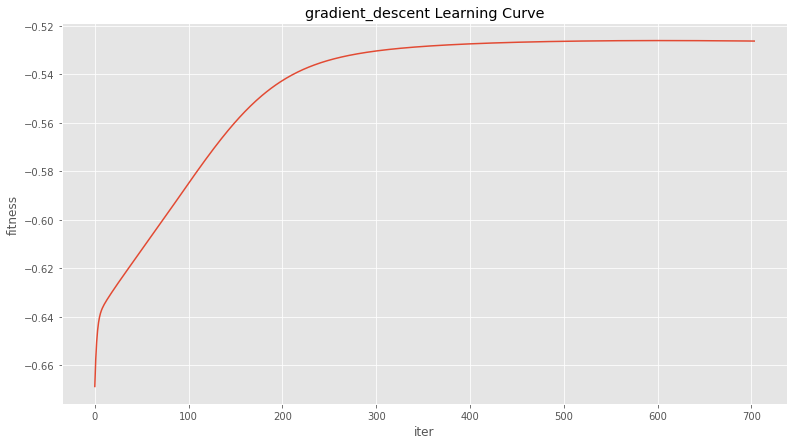

In [80]:
plt.plot(nn_model.fitness_curve)
plt.title('gradient_descent Learning Curve')
plt.xlabel('iter')
plt.ylabel('fitness')

In [111]:
curves_dict = {}
df_result_list = []

In [120]:
df_result, nn_model = run(algorithm='random_hill_climb', restarts=0, learning_rate=0.01, max_iters=5000)
curves_dict['restars=0,LR=0.01'] = nn_model.fitness_curve
df_result['hyper'] = 'restars=0,LR=0.01'
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,random_hill_climb,0.749063,0.682286,0.753252,0.684667,11.012551,"restars=0,LR=0.01"


In [121]:
df_result, nn_model = run(algorithm='random_hill_climb', restarts=2, learning_rate=0.01, max_iters=5000)
hyper = 'restars=2,LR=0.01'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,random_hill_climb,0.748613,0.686286,0.7582,0.686667,34.984455,"restars=2,LR=0.01"


In [122]:
df_result, nn_model = run(algorithm='random_hill_climb', restarts=2, learning_rate=0.001, max_iters=5000)
hyper = 'restars=2,LR=0.001'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,random_hill_climb,0.5,0.655429,0.5,0.659333,36.118904,"restars=2,LR=0.001"


In [125]:
df_result, nn_model = run(algorithm='random_hill_climb', restarts=2, learning_rate=0.1, max_iters=5000)
hyper = 'restars=2,LR=0.1'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,random_hill_climb,0.802691,0.817429,0.792965,0.812,33.154548,"restars=2,LR=0.1"


In [127]:
df_result, nn_model = run(algorithm='random_hill_climb', restarts=2, learning_rate=0.5, max_iters=5000)
hyper = 'restars=2,LR=0.5'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,random_hill_climb,0.81318,0.824857,0.796804,0.814667,28.34925,"restars=2,LR=0.5"


In [150]:
df_all_result = pd.concat(df_result_list)
df_all_result

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,simulated_annealing,0.792937,0.662000,0.832325,0.667333,13.464365,"T=1e2,r=0.005,LR=0.01"
RO,simulated_annealing,0.764025,0.780000,0.758389,0.779333,14.054681,"T=1e2,r=0.005,LR=0.1"
RO,simulated_annealing,0.500000,0.655429,0.500000,0.659333,13.293880,"T=1e2,r=0.005,LR=0.001"
RO,simulated_annealing,0.500000,0.655429,0.500000,0.659333,14.048927,"T=1e5,r=0.005,LR=0.01"
RO,simulated_annealing,0.789043,0.666571,0.833221,0.670000,12.634863,"T=1e1,r=0.005,LR=0.01"
RO,simulated_annealing,0.718025,0.723143,0.711085,0.717333,14.241306,"T=1e1,r=0.005,LR=0.05"


Text(0, 0.5, 'fitness')

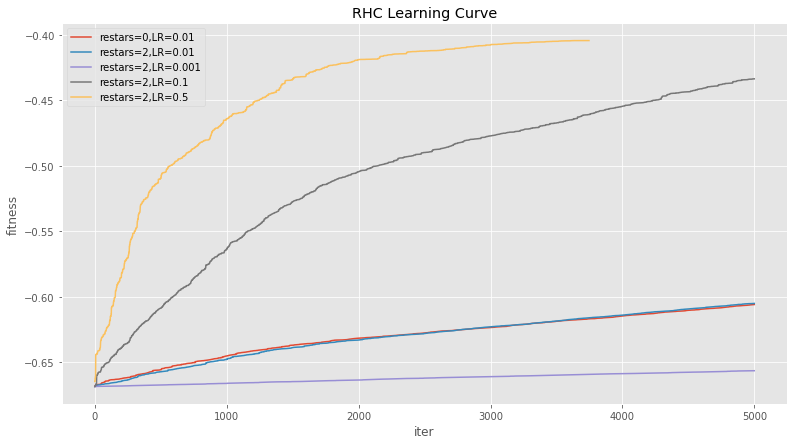

In [128]:
for k,v in curves_dict.items():
    plt.plot(v, label=k)
plt.legend(loc="best")    
plt.title('RHC Learning Curve')
plt.xlabel('iter')
plt.ylabel('fitness')

In [136]:
curves_dict = {}
df_result_list = []

In [137]:
df_result, nn_model = run(algorithm='simulated_annealing', learning_rate=0.01, max_iters=5000, 
                          schedule=mlrose.ExpDecay(init_temp = 1e2, exp_const=0.005, min_temp=1e-10))
hyper = 'T=1e2,r=0.005,LR=0.01'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,simulated_annealing,0.792937,0.662,0.832325,0.667333,13.464365,"T=1e2,r=0.005,LR=0.01"


In [138]:
df_result, nn_model = run(algorithm='simulated_annealing', learning_rate=0.1, max_iters=5000, schedule=mlrose.ExpDecay(init_temp = 1e2, exp_const=0.005, min_temp=1e-10))
hyper = 'T=1e2,r=0.005,LR=0.1'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,simulated_annealing,0.764025,0.78,0.758389,0.779333,14.054681,"T=1e2,r=0.005,LR=0.1"


In [140]:
df_result, nn_model = run(algorithm='simulated_annealing', learning_rate=0.001, max_iters=5000, schedule=mlrose.ExpDecay(init_temp = 1e2, exp_const=0.005, min_temp=1e-10))
hyper = 'T=1e2,r=0.005,LR=0.001'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,simulated_annealing,0.5,0.655429,0.5,0.659333,13.29388,"T=1e2,r=0.005,LR=0.001"


In [142]:
df_result, nn_model = run(algorithm='simulated_annealing', learning_rate=0.01, max_iters=5000, 
                          schedule=mlrose.ExpDecay(init_temp = 1e5, exp_const=0.005, min_temp=1e-10))
hyper = 'T=1e5,r=0.005,LR=0.01'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,simulated_annealing,0.5,0.655429,0.5,0.659333,14.048927,"T=1e5,r=0.005,LR=0.01"


In [146]:
df_result, nn_model = run(algorithm='simulated_annealing', learning_rate=0.01, max_iters=5000, 
                          schedule=mlrose.ExpDecay(init_temp = 1e1, exp_const=0.005, min_temp=1e-10))
hyper = 'T=1e1,r=0.005,LR=0.01'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,simulated_annealing,0.789043,0.666571,0.833221,0.67,12.634863,"T=1e1,r=0.005,LR=0.01"


In [148]:
df_result, nn_model = run(algorithm='simulated_annealing', learning_rate=0.05, max_iters=5000, 
                          schedule=mlrose.ExpDecay(init_temp = 1e1, exp_const=0.005, min_temp=1e-10))
hyper = 'T=1e1,r=0.005,LR=0.05'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,simulated_annealing,0.718025,0.723143,0.711085,0.717333,14.241306,"T=1e1,r=0.005,LR=0.05"


In [150]:
df_all_result = pd.concat(df_result_list)
df_all_result

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,simulated_annealing,0.792937,0.662000,0.832325,0.667333,13.464365,"T=1e2,r=0.005,LR=0.01"
RO,simulated_annealing,0.764025,0.780000,0.758389,0.779333,14.054681,"T=1e2,r=0.005,LR=0.1"
RO,simulated_annealing,0.500000,0.655429,0.500000,0.659333,13.293880,"T=1e2,r=0.005,LR=0.001"
RO,simulated_annealing,0.500000,0.655429,0.500000,0.659333,14.048927,"T=1e5,r=0.005,LR=0.01"
RO,simulated_annealing,0.789043,0.666571,0.833221,0.670000,12.634863,"T=1e1,r=0.005,LR=0.01"
RO,simulated_annealing,0.718025,0.723143,0.711085,0.717333,14.241306,"T=1e1,r=0.005,LR=0.05"


Text(0, 0.5, 'fitness')

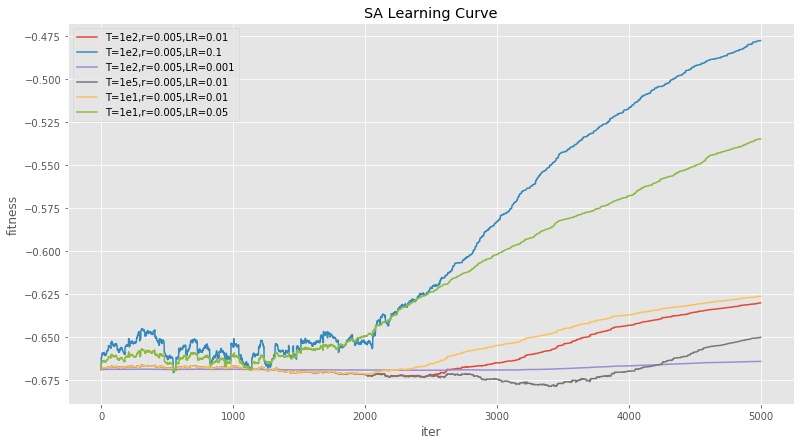

In [149]:
for k,v in curves_dict.items():
    plt.plot(v, label=k)
plt.legend(loc="best")    
plt.title('SA Learning Curve')
plt.xlabel('iter')
plt.ylabel('fitness')

In [151]:
curves_dict = {}
df_result_list = []

In [152]:
df_result, nn_model = run(algorithm='genetic_alg', learning_rate=0.01, max_iters=5000, pop_size=200, mutation_prob=0.1)
hyper = 'pop_size=200,mutation_prob=0.1,LR=0.01'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,genetic_alg,0.635149,0.679714,0.641708,0.686,50.674465,"pop_size=200,mutation_prob=0.1,LR=0.01"


In [154]:
df_result, nn_model = run(algorithm='genetic_alg', learning_rate=0.01, max_iters=5000, pop_size=200, mutation_prob=0.2)
hyper = 'pop_size=200,mutation_prob=0.2,LR=0.01'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,genetic_alg,0.654671,0.693714,0.65604,0.696667,49.156404,"pop_size=200,mutation_prob=0.2,LR=0.01"


In [159]:
df_result, nn_model = run(algorithm='genetic_alg', learning_rate=0.01, max_iters=5000, pop_size=200, mutation_prob=0.3)
hyper = 'pop_size=200,mutation_prob=0.3,LR=0.01'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,genetic_alg,0.597074,0.644286,0.597423,0.646,56.175882,"pop_size=200,mutation_prob=0.3,LR=0.01"


In [160]:
df_result, nn_model = run(algorithm='genetic_alg', learning_rate=0.01, max_iters=5000, pop_size=300, mutation_prob=0.2)
hyper = 'pop_size=300,mutation_prob=0.2,LR=0.01'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,genetic_alg,0.559563,0.619429,0.582302,0.640667,93.011358,"pop_size=300,mutation_prob=0.2,LR=0.01"


In [163]:
df_result, nn_model = run(algorithm='genetic_alg', learning_rate=0.001, max_iters=5000, pop_size=200, mutation_prob=0.2)
hyper = 'pop_size=200,mutation_prob=0.2,LR=0.001'
curves_dict[hyper] = nn_model.fitness_curve
df_result['hyper'] = hyper
df_result_list.append(df_result)
display(df_result)

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,genetic_alg,0.654671,0.693714,0.65604,0.696667,47.520353,"pop_size=200,mutation_prob=0.2,LR=0.001"


In [164]:
df_all_result = pd.concat(df_result_list)
df_all_result

,RO,train_auc,train_accuracy,test_auc,test_accuracy,wall_clock_time,hyper
RO,genetic_alg,0.635149,0.679714,0.641708,0.686000,50.674465,"pop_size=200,mutation_prob=0.1,LR=0.01"
RO,genetic_alg,0.654671,0.693714,0.656040,0.696667,49.156404,"pop_size=200,mutation_prob=0.2,LR=0.01"
RO,genetic_alg,0.597074,0.644286,0.597423,0.646000,56.175882,"pop_size=200,mutation_prob=0.3,LR=0.01"
RO,genetic_alg,0.559563,0.619429,0.582302,0.640667,93.011358,"pop_size=300,mutation_prob=0.2,LR=0.01"
RO,genetic_alg,0.654671,0.693714,0.656040,0.696667,47.520353,"pop_size=200,mutation_prob=0.2,LR=0.001"


Text(0, 0.5, 'fitness')

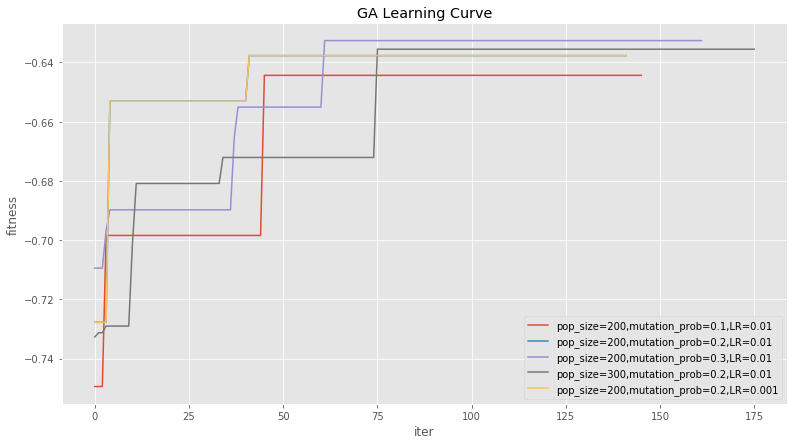

In [165]:
for k,v in curves_dict.items():
    plt.plot(v, label=k)
plt.legend(loc="best")    
plt.title('GA Learning Curve')
plt.xlabel('iter')
plt.ylabel('fitness')